In [8]:
setwd("/Users/aryamanbahl/Desktop/IIITH/Research/Metabrick_RRBS/analysis_files")
getwd()
source("metabric_rrbs/scripts/utils.R", encoding = "latin1")

[1] "/Users/aryamanbahl/Desktop/IIITH/Research/Metabrick_RRBS/analysis_files"

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

install.packages("dplyr")
install.packages("data.table")
install.packages("readxl")
BiocManager::install("impute")
installed.packages("limma")


The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//Rtmp2LnaR2/downloaded_packages

The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//Rtmp2LnaR2/downloaded_packages

The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//Rtmp2LnaR2/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'impute'




The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//Rtmp2LnaR2/downloaded_packages


Old packages: 'BiocParallel', 'KMsurv', 'MatrixModels', 'R.cache', 'R.oo',
  'RSQLite', 'RcppArmadillo', 'Rdpack', 'broom', 'cli', 'cluster',
  'collections', 'commonmark', 'curl', 'diffobj', 'doBy', 'doFuture', 'doRNG',
  'docopt', 'fastcluster', 'foreign', 'fs', 'future', 'gclus', 'gdtools',
  'generics', 'gert', 'ggplot2', 'globals', 'httpuv', 'httr2', 'hunspell',
  'jpeg', 'jsonlite', 'knitr', 'later', 'lattice', 'lme4', 'magick',
  'markdown', 'maxstat', 'mgcv', 'mime', 'miniUI', 'nlme', 'nloptr', 'officer',
  'parallelly', 'pbdZMQ', 'pbkrtest', 'pillar', 'pkgbuild', 'pkgdown',
  'prodlim', 'ps', 'ragg', 'recipes', 'reformulas', 'reticulate', 'rlang',
  'rvg', 'sass', 'scales', 'sparsevctrs', 'stringi', 'systemfonts',
  'textshaping', 'tinytex', 'utf8', 'writexl', 'xfun', 'xml2', 'zip', 'zoo'



In [ ]:
library(tidyverse)
library(data.table)
library(dplyr)
library(readxl)
library(readr)
library(impute)
library(limma)

## Sample data 

In [10]:
metadata <- read_excel("data/S1 - Sample Information.xlsx", sheet = "Sheet1")
dim(metadata)        
colnames(metadata)
head(metadata)        

[1] 1782   27

[1] "samp"              "patient"           "batch"            
 [4] "track"             "total_reads"       "mapped_reads"     
 [7] "mapped_frac"       "cg_num"            "meth_calls"       
[10] "global_avg_meth"   "type"              "age"              
[13] "grade"             "stage"             "ER"               
[16] "IHC"               "iC10"              "PAM50"            
[19] "matched_normal"    "matched_tumor"     "digpath_lymph"    
[22] "digpath_stromal"   "IMC_Fibroblasts"   "IMC_Lymphocytes"  
[25] "ASCAT_cellularity" "MathScore"         "log10_global_epm"

samp,patient,batch,track,total_reads,mapped_reads,mapped_frac,cg_num,meth_calls,global_avg_meth,...,PAM50,matched_normal,matched_tumor,digpath_lymph,digpath_stromal,IMC_Fibroblasts,IMC_Lymphocytes,ASCAT_cellularity,MathScore,log10_global_epm
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MB_0006,P2,b4,metabric_rrbs_new.BATCH4.SLX_10703.A004.C8107ANXX,16994775,14269780,0.8396569,4001519,55735755,0.5578358,...,LUMB,NA,NA,0.08118741,0.5749816,NA,NA,0.58,0.8236636,NA
MB_0028,P6,b1,metabric_rrbs_new.BATCH1.SLX_10132.A016.C6J71ANXX,12814856,11528115,0.8995899,4763459,45868097,0.6253500,...,LUMB,NA,NA,0.15468349,0.5017763,0.04735547,0.0104551050,0.69,0.6455982,4.190811
MB_0030,P7,b1,metabric_rrbs_new.BATCH1.SLX_10132.A018.C6J71ANXX,12366830,11114423,0.8987285,4464651,43879242,0.5822559,...,NA,NA,NA,0.13091014,0.5361913,0.48115298,0.0144124170,NA,NA,3.480036
MB_0035,P8,b4,metabric_rrbs_new.BATCH4.SLX_10702.A005.C8107ANXX,22283773,18670811,0.8378658,3977722,66980881,0.6533751,...,HER2,NA,NA,0.11840248,0.5022391,0.07276657,0.0000000000,0.51,0.3576067,NA
MB_0040,P9,b1,metabric_rrbs_new.BATCH1.SLX_10133.A015.C6J71ANXX,10309989,8842899,0.8577021,4305845,34669398,0.5911771,...,NA,NA,NA,0.21741995,0.5176772,0.67786068,0.0006218905,NA,0.1147223,3.609631
MB_0046,P11,b4,metabric_rrbs_new.BATCH4.SLX_10702.A016.C8107ANXX,16865163,14138471,0.8383240,3915679,52680191,0.5778299,...,LUMA,NA,NA,0.07668140,0.4993792,NA,NA,0.40,0.3057615,NA


In [11]:
table(metadata$type)
table(metadata$ER)
table(metadata$IHC)
table(metadata$PAM50)


ADJNORMAL    TUMOUR 
      244      1538 


negative   normal positive 
     350      244     1179 


ADJNORMAL  ER+HER2+  ER+HER2-  ER-HER2+      TNBC 
      244        44      1117        59       307 


ADJNORMAL     BASAL   CLAUDIN      HER2      LUMA      LUMB    NORMAL 
      244       144       139       174       500       340       115 

In [ ]:
tumor_samples <- metadata %>% filter(type == "TUMOUR") %>% pull(samp)
normal_samples <- metadata %>% filter(type == "ADJNORMAL") %>% pull(samp)

length(tumor_samples)
length(normal_samples)

[1] 1538

[1] 244

In [16]:
tss_coords<-read_tsv("data/gene_tss.tsv")
head(tss_coords)

genes_annot <- read_csv("data/genes_annot.csv")
head(genes_annot)

Rows: 33241 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (1): full_name
dbl (1): tss

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


full_name,tss
<chr>,<dbl>
chr1.+.DDX11L1,11873
chr1.+.MIR1302-10,30365
chr1.+.MIR1302-11,30365
chr1.+.MIR1302-2,30365
chr1.+.MIR1302-9,30365
chr1.+.OR4F5,69090


Rows: 114 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): gene, type, description
dbl (1): clust

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,type,description,clust
<chr>,<chr>,<chr>,<dbl>
ZIC2,EMB_TF,NA,15
TMEM97,Extra,NA,15
NKX2-2,EMB_TF,NA,15
CBX2,PcG,NA,15
SIX4,EMB_TF,NA,15
GATA2,EMB_TF,NA,15


### Methylation data 

In [111]:
prom_meth <- read_csv("data/promoter_avg_meth_filt.csv")
prom_meth <- prom_meth %>% select(-name3.chr)
dim(prom_meth)
head(prom_meth)

Rows: 15793 Columns: 1787
-- Column specification --------------------------------------------------------
Delimiter: ","
chr    (3): chrom, name, name3.chr
dbl (1784): start, end, MB_0006, MB_0028, MB_0030, MB_0035, MB_0040, MB_0046...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 15793  1786

chrom,start,end,name,MB_0006,MB_0028,MB_0030,MB_0035,MB_0040,MB_0046,...,MB_7281,MB_7283,MB_7285,MB_7288,MB_7289,MB_7291,MB_7292,MB_7293,MB_7296,MB_7298
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,762469,763020,LINC01128,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.01829268,NA,0.000000000,0.000000000,0.00000000,0.00000000,0.006849315,NA,0.000000000
chr1,762676,763227,LINC01128,0.021929825,0.03018109,0.07858546,0.00000000,0.01627486,0.21922626,...,0.02374169,0.17092338,0.01785714,0.000000000,0.066974596,0.00000000,0.11016949,0.042925278,0.01030928,0.062780269
chr1,860619,861170,SAMD11,0.001870324,0.01188300,0.01046622,0.15767196,0.01549464,0.05299539,...,0.01910480,0.00802139,0.02392344,0.002307692,0.002057613,0.01895375,0.02185792,0.000000000,0.00000000,0.006283229
chr1,895465,896016,KLHL17,0.014367816,0.04901961,0.04769737,0.03629032,0.03182580,0.06606607,...,0.03778802,0.04700855,0.11333333,0.004689332,0.030204962,0.02810651,0.14285714,0.026392962,0.09826590,0.058666667
chr1,901375,901926,PLEKHN1,0.024253731,0.05357143,0.02334630,0.01470588,0.01798561,0.00000000,...,0.10212766,0.04149378,0.01369863,0.000000000,0.015873016,0.07216495,0.07185629,0.021526419,0.00000000,0.029490617
chr1,948345,948896,ISG15,0.000000000,0.00000000,0.00000000,0.02083333,0.00000000,0.00000000,...,0.00000000,0.02439024,0.00000000,0.009523810,0.010309278,0.00000000,0.00000000,0.000000000,0.00000000,0.000000000


In [112]:
# Averaging out methylation values for each gene to keep on value for each gene
prom_meth_clean <- prom_meth %>%
  select(-start, -end) %>%
  group_by(name) %>%
  summarise(across(everything(), mean, na.rm = TRUE)) %>%
  ungroup()

meth_matrix <- prom_meth_clean %>%
  column_to_rownames("name") %>%
  as.matrix()

# Remove samples with >80% missing values
meth_matrix_filtered <- meth_matrix[, colMeans(is.na(meth_matrix)) <= 0.8]

# Now run imputation
imputed <- impute.knn(meth_matrix_filtered, k = 5)
# dropped_samples <- colnames(meth_matrix)[colMeans(is.na(meth_matrix)) > 0.8]


Warning message:
"There were 13552 warnings in `summarise()`.
The first warning was:
i In argument: `across(everything(), mean, na.rm = TRUE)`.
i In group 1: `name = "A2M-AS1"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
i Run `dplyr::last_dplyr_warnings()` to see the 13551 remaining warnings."


Cluster size 13552 broken into 11797 1755 
Cluster size 11797 broken into 1793 10004 
Cluster size 1793 broken into 754 1039 
Done cluster 754 
Done cluster 1039 
Done cluster 1793 
Cluster size 10004 broken into 1513 8491 
Cluster size 1513 broken into 537 976 
Done cluster 537 
Done cluster 976 
Done cluster 1513 
Cluster size 8491 broken into 7111 1380 
Cluster size 7111 broken into 272 6839 
Done cluster 272 
Cluster size 6839 broken into 5123 1716 
Cluster size 5123 broken into 5064 59 
Cluster size 5064 broken into 5060 4 
Cluster size 5060 broken into 5056 4 
Cluster size 5056 broken into 1 5055 
Done cluster 1 
Cluster size 5055 broken into 17 5038 
Done cluster 17 
Cluster size 5038 broken into 2673 2365 
Cluster size 2673 broken into 1060 1613 
Done cluster 1060 
Cluster size 1613 broken into 2 1611 
Done cluster 2 
Cluster size 1611 broken into 1 1610 
Done cluster 1 
Cluster size 1610 broken into 1609 1 
Cluster size 1609 broken into 1608 1 
Cluster size 1608 broken into 9 

In [113]:
imputed_df <- as.data.frame(imputed$data) %>%
   rownames_to_column("name")
   
head(imputed_df)
dim(imputed_df)

,name,MB_0006,MB_0028,MB_0030,MB_0035,MB_0040,MB_0046,MB_0050,MB_0053,MB_0054,...,MB_7281,MB_7283,MB_7285,MB_7288,MB_7289,MB_7291,MB_7292,MB_7293,MB_7296,MB_7298
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A2M-AS1,0.04503106,0.06653226,0.058189655,0.01548673,0.05649718,0.1024390,0.001904762,0.03910615,0.08031088,...,0.10837438,0.001915709,0.004672897,0.004048583,0.00000000,0.177111717,0.015463918,0.09090909,0.10000000,0.06956522
2,A4GALT,0.01758242,0.03809524,0.015197568,0.03333333,0.02208202,0.0000000,0.009803922,0.23631124,0.02346041,...,0.02639296,0.202150538,0.061224490,0.000000000,0.06274510,0.039772727,0.007751938,0.01162791,0.00000000,0.01463415
3,AAAS,0.00000000,0.00000000,0.004347826,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,...,0.00000000,0.013043478,0.000000000,0.000000000,0.01181102,0.003401361,0.000000000,0.01415094,0.00000000,0.00000000
4,AACS,0.00000000,0.01980198,0.030000000,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.03296703,...,0.00000000,0.026315789,0.010908763,0.000000000,0.00000000,0.007194245,0.000000000,0.00000000,0.00000000,0.00000000
5,AADACL2-AS1,0.87037037,0.95876289,0.976744186,0.98739496,0.87155963,0.9655172,0.969230769,0.76335878,0.97931034,...,0.92241379,0.962264151,0.935483871,0.812500000,0.93916350,0.921348315,0.934030881,0.93750000,1.00000000,0.81318681
6,AADAT,0.04423454,0.10129164,0.145657339,0.25582886,0.07697122,0.1254959,0.063224415,0.29063399,0.11874137,...,0.17214703,0.791520791,0.123962052,0.104915636,0.09474926,0.101307895,0.070596629,0.24767405,0.07254412,0.11727368


[1] 13552  1783

In [178]:
meth_long_labeled <- imputed_df %>%
  pivot_longer(-name, names_to = "Sample_ID", values_to = "Beta_Methylation") %>%
  rename(Gene = name) %>%
  mutate(Group = case_when(
    Sample_ID %in% tumor_samples ~ "Tumor",
    Sample_ID %in% normal_samples ~ "Normal",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(Group))

In [183]:
# 1. Compute mean beta per gene per group
beta_avg <- meth_long_labeled %>%
  group_by(Gene, Group) %>%
  summarise(mean_beta = mean(Beta_Methylation), .groups = "drop")

# 2. Pivot to wide to get tumor and normal side-by-side
delta_beta_df <- beta_avg %>%
  pivot_wider(names_from = Group, values_from = mean_beta, names_prefix = "mean_beta_") %>%
  mutate(delta_beta = mean_beta_Tumor - mean_beta_Normal)

# 3. Filter for DMRs
dmr_genes <- delta_beta_df %>%
  filter(abs(delta_beta) > 0.2) %>%
  arrange(desc(abs(delta_beta)))

In [195]:
head(meth_long_labeled)
head(delta_beta_df)
print(dmr_genes)

Gene,Sample_ID,Beta_Methylation,Group
<chr>,<chr>,<dbl>,<chr>
A2M-AS1,MB_0006,0.04503106,Tumor
A2M-AS1,MB_0028,0.06653226,Tumor
A2M-AS1,MB_0030,0.05818966,Tumor
A2M-AS1,MB_0035,0.01548673,Tumor
A2M-AS1,MB_0040,0.05649718,Tumor
A2M-AS1,MB_0046,0.10243902,Tumor


name,mean_beta_tumor,mean_beta_normal,delta_beta
<chr>,<dbl>,<dbl>,<dbl>
A2M-AS1,0.085542723,0.047311498,0.0382312251
A4GALT,0.029933318,0.021547509,0.0083858098
AAAS,0.003100639,0.002568996,0.0005316430
AACS,0.010184859,0.009723214,0.0004616454
AADACL2-AS1,0.913754975,0.945279710,-0.0315247358
AADAT,0.144276451,0.080670454,0.0636059969


# A tibble: 389 x 4
   name         mean_beta_tumor mean_beta_normal delta_beta
   <chr>                  <dbl>            <dbl>      <dbl>
 1 RGS22                  0.564           0.121       0.443
 2 CCDC181                0.461           0.0636      0.397
 3 RARRES2                0.651           0.256       0.395
 4 PFN3                   0.663           0.279       0.384
 5 FAM193A                0.717           0.335       0.382
 6 LOC101929415           0.457           0.0810      0.376
 7 CA3                    0.450           0.0897      0.361
 8 MIR663AHG              0.436           0.0869      0.349
 9 SLC35F4                0.413           0.0661      0.347
10 ZNF350-AS1             0.474           0.128       0.347
# i 379 more rows


In [190]:
# tumor_meth <- imputed_df %>% select(name, all_of(tumor_samples))
# normal_meth <- imputed_df %>% select(name, all_of(normal_samples))
# dim(tumor_meth)
# dim(normal_meth)
# head(tumor_meth)

In [191]:
# #Converting the data to long format
# tumor_meth_long <- tumor_meth %>%
#   pivot_longer(-name, names_to = "Sample_ID", values_to = "Beta_Methylation")

# normal_meth_long <- normal_meth %>%
#   pivot_longer(-name, names_to = "Sample_ID", values_to = "Beta_Methylation")

# head(tumor_meth_long)
# head(normal_meth_long)

In [181]:
# ggplot(tumor_meth_long, aes(x = Beta_Methylation)) +
#   geom_histogram(bins = 30, fill = "steelblue", color = "black") +
#   theme_minimal() +
#   labs(title = "Distribution of Beta Methylation in Tumor Samples")

In [192]:
# Compute average beta values for each gene
# tumor_avg <- tumor_meth_long %>%
#   group_by(name) %>%
#   summarise(mean_beta_tumor = mean(Beta_Methylation))

# normal_avg <- normal_meth_long %>%
#   group_by(name) %>%
#   summarise(mean_beta_normal = mean(Beta_Methylation))

# # Calculate delta beta values
# delta_beta_df <- inner_join(tumor_avg, normal_avg, by = "name") %>%
#   mutate(delta_beta = mean_beta_tumor - mean_beta_normal)

In [118]:
getwd()

[1] "/Users/aryamanbahl/Desktop/IIITH/Research/Metabrick_RRBS/analysis_files"

In [193]:
# dmr_genes <- delta_beta_df %>%
#   filter(abs(delta_beta) > 0.2)  # adjust threshold if needed

# # Optional: sort by effect size
# dmr_genes <- dmr_genes %>%
#   arrange(desc(abs(delta_beta)))

# dim(dmr_genes)
# head(dmr_genes)

In [194]:
# write_tsv(dmr_genes, "./nita/data/differentially_methylated_genes.tsv")
# write_tsv(imputed_df, "./nita/data/imputed_methylation_data.tsv")

Limma test 

In [121]:
# Matrix from your imputation step
meth_matrix <- imputed$data  # rows: genes, cols: samples

# Sample labels
group <- rep(NA, ncol(meth_matrix))
group[colnames(meth_matrix) %in% tumor_samples] <- "Tumor"
group[colnames(meth_matrix) %in% normal_samples] <- "Normal"
group <- factor(group)

# Check
table(group)

design <- model.matrix(~ group)
colnames(design)  # should show: (Intercept), groupTumor


fit <- lmFit(meth_matrix, design)  # Fit linear model
fit <- eBayes(fit)  # Empirical Bayes moderation
topTable <- topTable(fit, coef = "groupTumor", adjust = "fdr", number = Inf)

# View top DMRs
head(topTable)
dim(topTable)
topTable <- topTable %>%
  rownames_to_column("name")

dmrs_limma <- topTable %>%
  filter(abs(logFC) > 0.2, adj.P.Val < 0.05)  # adjust thresholds as needed

head(dmrs_limma)
dim(dmrs_limma)

group
Normal  Tumor 
   244   1538 

[1] "(Intercept)" "groupTumor"

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CLDN15,0.3464979,0.7032807,38.62804,1.236462e-237,1.675654e-233,532.8939
TPTE,0.1184310,0.8368518,38.56633,4.527073e-237,3.067544e-233,531.5964
DNHD1,0.3242689,0.7421438,35.00313,1.029206e-204,4.649267e-201,457.1170
FAM193A,0.3817032,0.6645227,33.86437,1.752624e-194,5.937889e-191,433.5688
PRKCZ,0.1644233,0.5031888,33.63183,2.110296e-192,5.719747e-189,428.7801
PTK6,-0.2238605,0.1832359,-32.05179,2.351646e-178,5.311583e-175,396.4519


[1] 13552     6

,name,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CLDN15,0.3464979,0.7032807,38.62804,1.236462e-237,1.675654e-233,532.8939
2,DNHD1,0.3242689,0.7421438,35.00313,1.029206e-204,4.649267e-201,457.1170
3,FAM193A,0.3817032,0.6645227,33.86437,1.752624e-194,5.937889e-191,433.5688
4,PTK6,-0.2238605,0.1832359,-32.05179,2.351646e-178,5.311583e-175,396.4519
5,RGS22,0.4428162,0.5028946,31.19260,8.615077e-171,1.667879e-167,379.0453
6,FXYD1,0.2995720,0.6001037,30.72824,9.964368e-167,1.687964e-163,369.6952


[1] 389   7


	Pearson's product-moment correlation

data:  comparison_df$delta_beta and comparison_df$logFC
t = 538963984, df = 387, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 1 1
sample estimates:
cor 
  1 


[1] "Correlation coefficient: 0.999999999999999"


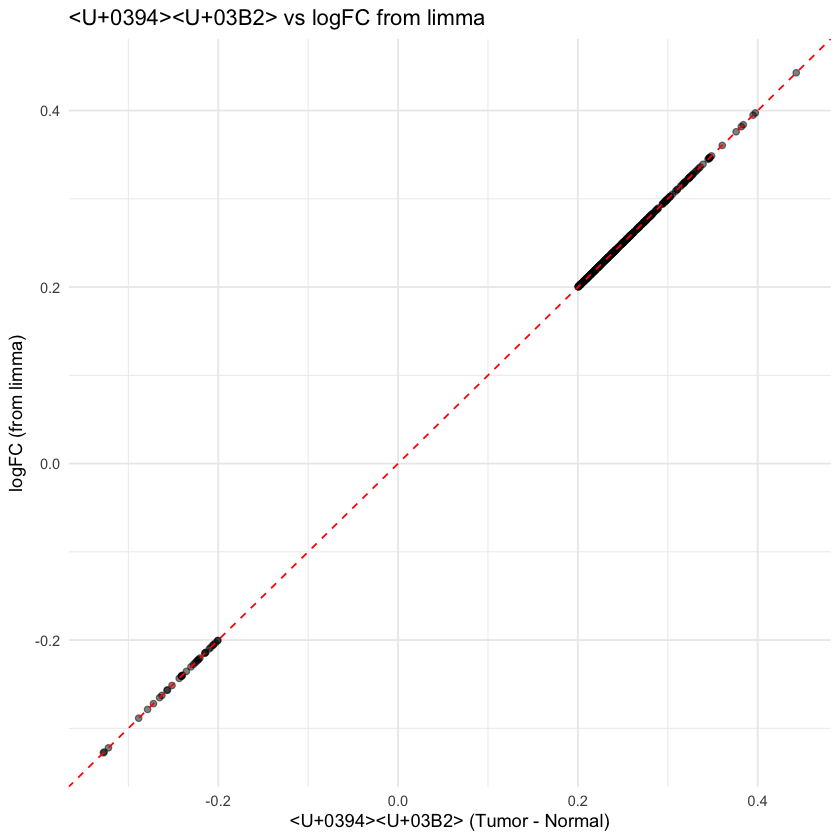

In [122]:
comparison_df <- inner_join(delta_beta_df, dmrs_limma, by = "name")
ggplot(comparison_df, aes(x = delta_beta, y = logFC)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Δβ vs logFC from limma",
       x = "Δβ (Tumor - Normal)",
       y = "logFC (from limma)")

cor.test(comparison_df$delta_beta, comparison_df$logFC)
print(paste("Correlation coefficient:", cor(comparison_df$delta_beta, comparison_df$logFC)))

limma test and beta value test have a strong correlation.

### Expression data

In [173]:
expr_mat <- read_csv("data/expression_matrix.csv")
head(data)
dim(expr_mat)

Rows: 26245 Columns: 2129
-- Column specification --------------------------------------------------------
Delimiter: ","
chr    (3): chrom, name, name3.chr
dbl (2126): start, end, MB_0362, MB_0346, MB_0386, MB_0574, MB_0185, MB_0503...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


chrom,start,end,name,name3.chr,MB_0006,MB_0028,MB_0030,MB_0035,MB_0040,...,MB_7281,MB_7283,MB_7285,MB_7288,MB_7289,MB_7291,MB_7292,MB_7293,MB_7296,MB_7298
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,762469,763020,LINC01128,chr1.+.LINC01128.1,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.01829268,NA,0.000000000,0.000000000,0.00000000,0.00000000,0.006849315,NA,0.000000000
chr1,762676,763227,LINC01128,chr1.+.LINC01128.2,0.021929825,0.03018109,0.07858546,0.00000000,0.01627486,...,0.02374169,0.17092338,0.01785714,0.000000000,0.066974596,0.00000000,0.11016949,0.042925278,0.01030928,0.062780269
chr1,860619,861170,SAMD11,chr1.+.SAMD11,0.001870324,0.01188300,0.01046622,0.15767196,0.01549464,...,0.01910480,0.00802139,0.02392344,0.002307692,0.002057613,0.01895375,0.02185792,0.000000000,0.00000000,0.006283229
chr1,895465,896016,KLHL17,chr1.+.KLHL17,0.014367816,0.04901961,0.04769737,0.03629032,0.03182580,...,0.03778802,0.04700855,0.11333333,0.004689332,0.030204962,0.02810651,0.14285714,0.026392962,0.09826590,0.058666667
chr1,901375,901926,PLEKHN1,chr1.+.PLEKHN1,0.024253731,0.05357143,0.02334630,0.01470588,0.01798561,...,0.10212766,0.04149378,0.01369863,0.000000000,0.015873016,0.07216495,0.07185629,0.021526419,0.00000000,0.029490617
chr1,948345,948896,ISG15,chr1.+.ISG15,0.000000000,0.00000000,0.00000000,0.02083333,0.00000000,...,0.00000000,0.02439024,0.00000000,0.009523810,0.010309278,0.00000000,0.00000000,0.000000000,0.00000000,0.000000000


[1] 26245  2129

In [162]:
expr_matrix <- expr_clean %>%
  column_to_rownames("name") %>%
  as.matrix()
head(expr_matrix)
expr_unlogged <- 2^expr_matrix

library(genefilter)

ffun <- filterfun(pOverA(0.20, 100), cv(0.7, 10))
filter_result <- genefilter(expr_unlogged, ffun)

# Keep genes that pass the filter
expr_filtered <- expr_unlogged[filter_result, ]

# Optionally return to log2 scale
expr_filtered_log2 <- log2(expr_filtered)

,MB_0362,MB_0346,MB_0386,MB_0574,MB_0185,MB_0503,MB_0641,MB_0201,MB_0218,MB_0316,...,MB_1036,MB_1116,MB_1044,MB_1049,MB_1068,MB_0812,MB_1076,MB_0814,MB_1087,MB_0822
A1BG,5.607785,5.515704,5.581684,5.602209,5.560794,5.443726,5.374949,5.625163,5.533212,5.359228,...,5.225141,5.303794,5.490734,5.494082,5.269375,5.468187,5.566886,5.433821,5.320485,5.502541
A1BG-AS1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A1CF,5.409415,5.652667,5.364459,5.378185,5.485144,5.321734,5.386645,5.432328,5.332541,5.493423,...,5.428412,5.474348,5.419358,5.700195,5.478201,5.752783,5.673940,5.862117,5.424626,5.791611
A2M,7.653319,6.564312,8.201633,7.587296,8.427318,7.545219,8.693606,8.898809,8.763382,9.100264,...,9.198370,9.042949,10.144846,10.143342,9.782934,8.360063,9.929925,9.927135,9.638372,10.153996
A2M-AS1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A2ML1,5.535317,5.938013,5.337279,5.221707,5.514548,5.279701,5.201008,5.695971,5.108838,6.942946,...,5.366756,5.799424,5.139738,5.095827,5.545775,5.608514,5.503125,5.350733,5.267158,5.455640



Attaching package: 'genefilter'


The following object is masked from 'package:readr':

    spec




In [163]:
dim(expr_unlogged)         # before filtering
dim(expr_filtered_log2)    # after filtering

[1] 26245  2124

[1] 1416 2124

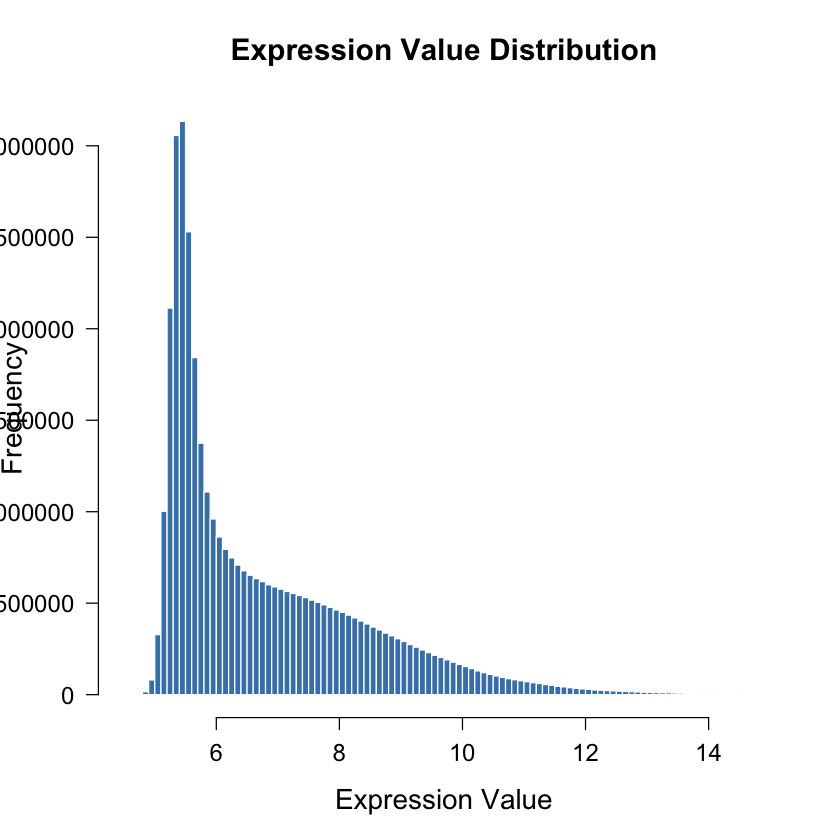

In [170]:
hist(
  as.numeric(unlist(expr_clean %>% select(-name))),
  breaks = 100,
  main = "Expression Value Distribution",
  xlab = "Expression Value",
  col = "steelblue",             # blue bars
  border = "white",              # remove bar borders
  cex.main = 1.5,                # increase title font size
  cex.lab = 1.4,                 # increase axis label font size
  cex.axis = 1.2,                # increase tick label size
  las = 1                        # horizontal axis labels
)

# Optional: set light background
par(bg = "white")  # or "gray95" for very light gray

In [ ]:
expr_long_filtered <- expr_filtered_log2 %>%
  as.data.frame() %>%
  rownames_to_column("Gene") %>%
  pivot_longer(-Gene, names_to = "Sample_ID", values_to = "Expression")

Gene,Sample_ID,Expression
<chr>,<chr>,<dbl>
A2M,MB_0362,7.653319
A2M,MB_0346,6.564312
A2M,MB_0386,8.201633
A2M,MB_0574,7.587296
A2M,MB_0185,8.427318
A2M,MB_0503,7.545219


[1] 3007584       3

In [176]:
expr_long_labeled <- expr_long_filtered %>%
  mutate(Group = case_when(
    Sample_ID %in% tumor_samples ~ "Tumor",
    Sample_ID %in% normal_samples ~ "Normal",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(Group))  # remove samples that aren't labeled
head(expr_long_labeled)

Gene,Sample_ID,Expression,Group
<chr>,<chr>,<dbl>,<chr>
A2M,MB_0362,7.653319,Tumor
A2M,MB_0386,8.201633,Tumor
A2M,MB_0574,7.587296,Tumor
A2M,MB_0503,7.545219,Tumor
A2M,MB_0201,8.898809,Tumor
A2M,MB_0218,8.763382,Tumor


In [200]:
expr_avg <- expr_long_labeled %>%
  group_by(Gene, Group) %>%
  summarise(mean_expr = mean(Expression, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(names_from = Group, values_from = mean_expr, names_prefix = "mean_expr_") %>%
  mutate(delta_expr = mean_expr_Tumor - mean_expr_Normal)
head(expr_avg)

Gene,mean_expr_Normal,mean_expr_Tumor,delta_expr
<chr>,<dbl>,<dbl>,<dbl>
A2M,9.615661,9.060828,-0.5548333
ABCA3,6.956976,7.719242,0.7622658
ABCA8,9.460738,6.357415,-3.1033225
ABCB9,7.061722,7.802257,0.7405352
ABCC11,6.178671,7.025987,0.8473162
ABCC8,6.280665,6.613724,0.3330585


merging expr and methylation

In [204]:
head(dmr_genes)

Gene,mean_beta_tumor,mean_beta_normal,delta_beta
<chr>,<dbl>,<dbl>,<dbl>
RGS22,0.5635271,0.12071097,0.4428162
CCDC181,0.4608988,0.06355955,0.3973392
RARRES2,0.6509755,0.25614017,0.3948353
PFN3,0.6632078,0.27926288,0.3839450
FAM193A,0.7167874,0.33508421,0.3817032
LOC101929415,0.4569550,0.08099144,0.3759636


In [205]:
dmr_expr_merged <- inner_join(dmr_genes, expr_avg, by = "Gene")
head(dmr_expr_merged)

Gene,mean_beta_tumor,mean_beta_normal,delta_beta,mean_expr_Normal,mean_expr_Tumor,delta_expr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RGS22,0.5635271,0.1207110,0.4428162,6.116625,6.044873,-0.07175191
RARRES2,0.6509755,0.2561402,0.3948353,10.705178,9.341990,-1.36318830
TAGLN,0.5112087,0.1869937,0.3242150,10.665425,9.506119,-1.15930583
HSPA7,0.4777316,0.1795493,0.2981823,7.672512,7.781231,0.10871905
HSPB6,0.4693547,0.1754199,0.2939348,9.544350,6.464520,-3.07983057
CRYAB,0.5716638,0.2885876,0.2830762,11.552219,8.606816,-2.94540358



	Spearman's rank correlation rho

data:  dmr_expr_merged$delta_beta and dmr_expr_merged$delta_expr
S = 4160, p-value = 0.03268
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4222222 


`geom_smooth()` using formula = 'y ~ x'


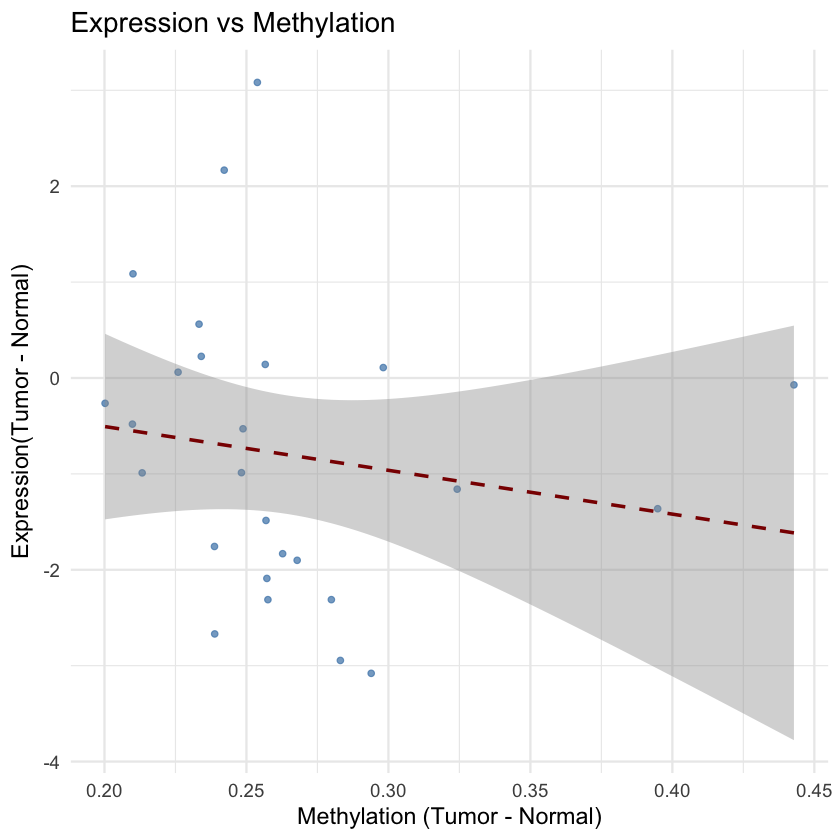

In [218]:
cor.test(dmr_expr_merged$delta_beta, dmr_expr_merged$delta_expr, method = "spearman")

ggplot(dmr_expr_merged, aes(x = delta_beta, y = delta_expr)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  geom_smooth(method = "lm", se = TRUE, color = "darkred", linetype = "dashed") +
  theme_minimal(base_size = 14) +
  labs(
    title = "Expression vs Methylation ",
    x = "Methylation (Tumor - Normal)",
    y = "Expression(Tumor - Normal)"
  )

the correlation suggests that genes with higher methylation (Δβ ↑) tend to have lower expression (ΔExpr ↓) 

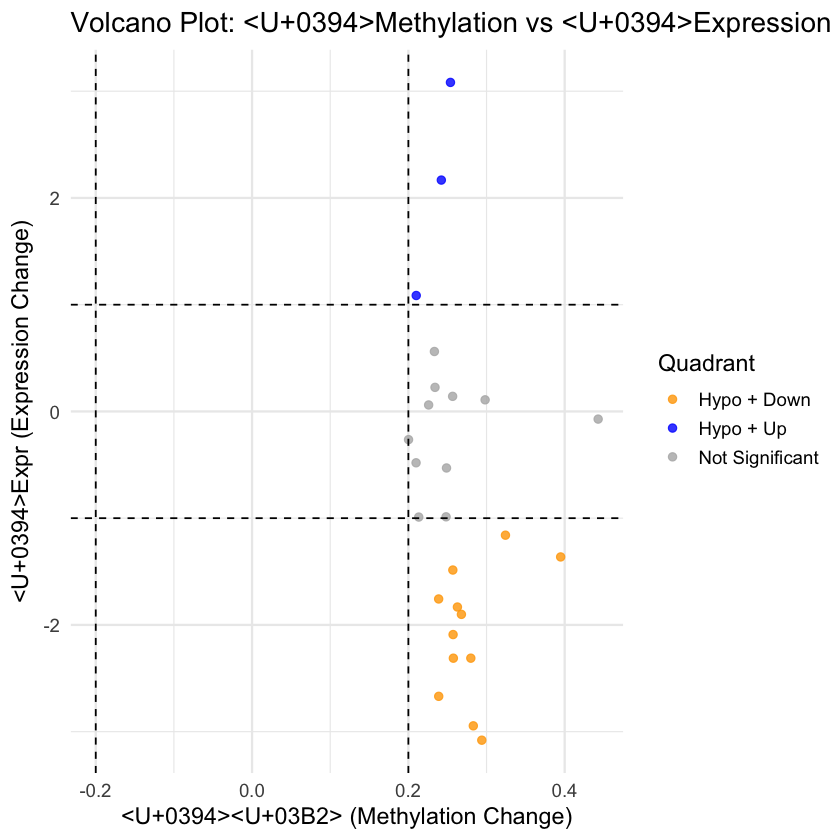

In [215]:
volcano_df <- dmr_expr_merged %>%
  mutate(Quadrant = case_when(
    delta_beta > 0.2 & delta_expr > 1 ~ "Hypo + Up",
    delta_beta < -0.2 & delta_expr < -1 ~ "Hyper + Down",
    delta_beta > 0.2 & delta_expr < -1 ~ "Hypo + Down",
    delta_beta < -0.2 & delta_expr > 1 ~ "Hyper + Up",
    TRUE ~ "Not Significant"
  ))

library(ggplot2)

ggplot(volcano_df, aes(x = delta_beta, y = delta_expr)) +
  geom_point(aes(color = Quadrant), alpha = 0.8, size = 2) +
  scale_color_manual(values = c(
    "Hypo + Up" = "blue",
    "Hyper + Down" = "red",
    "Hypo + Down" = "orange",
    "Hyper + Up" = "green",
    "Not Significant" = "gray70"
  )) +
  geom_vline(xintercept = c(-0.2, 0.2), linetype = "dashed", color = "black") +
  geom_hline(yintercept = c(-1, 1), linetype = "dashed", color = "black") +
  theme_minimal(base_size = 14) +
  labs(
    title = "Volcano Plot: ΔMethylation vs ΔExpression",
    x = "Δβ (Methylation Change)",
    y = "ΔExpr (Expression Change)",
    color = "Quadrant"
  )

In [216]:
inverse_genes <- dmr_expr_merged %>%
  filter((delta_beta > 0.2 & delta_expr < -1) | (delta_beta < -0.2 & delta_expr > 1))
head(inverse_genes)
dim(inverse_genes)

Gene,mean_beta_tumor,mean_beta_normal,delta_beta,mean_expr_Normal,mean_expr_Tumor,delta_expr,Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RARRES2,0.6509755,0.2561402,0.3948353,10.705178,9.341990,-1.363188,RARRES2
TAGLN,0.5112087,0.1869937,0.3242150,10.665425,9.506119,-1.159306,NA
HSPB6,0.4693547,0.1754199,0.2939348,9.544350,6.464520,-3.079831,HSPB6
CRYAB,0.5716638,0.2885876,0.2830762,11.552219,8.606816,-2.945404,CRYAB
CX3CL1,0.6233477,0.3434441,0.2799036,9.938606,7.627114,-2.311493,CX3CL1
GNG11,0.5732588,0.3053986,0.2678602,10.221563,8.320411,-1.901152,GNG11


[1] 12  8